In [234]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import tweepy
from datetime import datetime, timezone, date, timedelta
import matplotlib.pyplot as plt
from tqdm import tqdm
import requests
import yfinance as yf

In [235]:
import yfinance as yf
spy = yf.Ticker("SPY")
spy = spy.history(period="1y")

dia = yf.Ticker("DIA")
dia = dia.history(period="1y")

qqq = yf.Ticker("QQQ")
qqq = qqq.history(period="1y")

xlf = yf.Ticker("XLF")
xlf = xlf.history(period="1y")

Text(0.5, 1.0, 'Major ETF Prices over 1 Year')

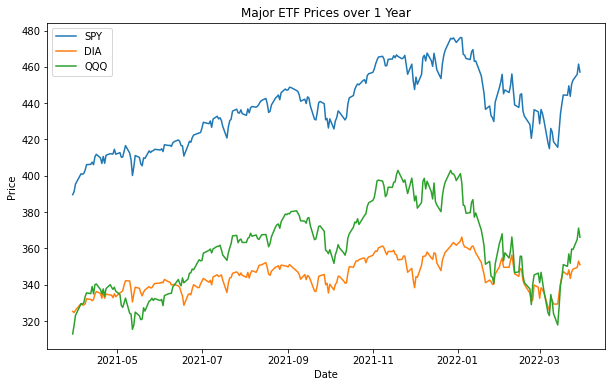

In [236]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(spy.index, spy.Close, label='SPY')
plt.plot(dia.index, dia.Close, label='DIA')
plt.plot(qqq.index, qqq.Close, label='QQQ')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Major ETF Prices over 1 Year')

In [237]:
import plotly.graph_objects as go
# print candlesticks last 200 min
fig = go.Figure(data=[go.Candlestick(x=spy.index, 
                                 open=spy['Open'], high=spy['High'], 
                                 low=spy['Low'], close=spy['Close'])])
fig.update_xaxes(title_text="$")
fig.update_yaxes(title_text="Time")
fig.update_layout(title="SPY Price over 1 year")
fig.show()

In [238]:
consumer_key = '7TiysPCAezYZAYbKXlByQrD3v'
consumer_secret = 'iHktyxghooHJvIHRF6xHdr3KvZeNCtYxo7vrEJlz2LBmOwvaaz'
access_token = '452862151-agKSJhfYb0ho2nBdlLgpjbZSf6K80bm5apiPdJwL'
access_secret = 'Yg6wXVo75WxPUeQyuk8t6A1stDlaIscRWpzzERkiVQNi7'
bearer = 'AAAAAAAAAAAAAAAAAAAAAHlNUwEAAAAAUrQ5vQKy1iuNtdoH6CYoJz2FQSY%3DQ7cBzPi9YLQBL3CVJEl7Xjt9iNqvYDw5xBAJJOmVswvUwSxTMI'

In [239]:
from datetime import datetime, timezone, date, timedelta
now = datetime.now()
if now.hour < 12:
    now = now.replace(hour=0, minute=0, second=0, microsecond=0)
else:
    now = now.replace(hour=12, minute=0, second=0, microsecond=0)

In [240]:
from tqdm import tqdm
import requests
import pandas as pd
# obtain all tweets within the past week
dtformat = '%Y-%m-%dT%H:%M:%SZ'
curr_day = now.strftime(dtformat)
dfs = []
currs = []
prevs = []

for i in tqdm(range(1, 7)):
    prev_day = ((now + timedelta(hours=-12))).strftime(dtformat)
    
    endpoint = 'https://api.twitter.com/2/tweets/search/recent'
    headers = {'authorization': f'Bearer {bearer}'}

    params = {
        'query': '(aapl stock) (lang:en)',
        'max_results': '100',
        'tweet.fields': 'created_at,lang',
        'start_time': prev_day,
        'end_time': curr_day
    }

    response = requests.get(endpoint,
                                params=params,
                                headers=headers)
    tweets_dict = dict(response.json())['data']
    time = [datetime(now.year, now.month, now.day) for x in range(0, len(tweets_dict))]
    tweets = []
    time_actual = []
    
    for tweet in tweets_dict:
        tweets.append(tweet['text'])
        time_actual.append(tweet['created_at'])

    df_tweets = pd.DataFrame({
        'end time':time,
        'actual time': time_actual,
        'tweet': tweets
    })
    
    currs.append(curr_day)
    prevs.append(prev_day)
    
    dfs.append(df_tweets)
    
    if now.hour == 0:
        now = datetime.strptime(curr_day, dtformat) + timedelta(hours=-12)
    else:
        now = datetime.strptime(curr_day, dtformat) + timedelta(days=-1)
    curr_day = now.strftime(dtformat)

100%|██████████| 6/6 [00:02<00:00,  2.12it/s]


In [241]:
df_tweets = pd.concat(dfs).reset_index(drop=True)

In [242]:
df_tweets.head()

,end time,actual time,tweet
0,2022-03-30,2022-03-30T11:59:34.000Z,@MarketRebels $AAPL has been more or less flat...
1,2022-03-30,2022-03-30T11:56:19.000Z,$QQQ $spy $AAPL Stock buybacks should be illeg...
2,2022-03-30,2022-03-30T11:47:11.000Z,RT @UPBOptionMil: Todays top stock option open...
3,2022-03-30,2022-03-30T11:46:16.000Z,RT @LuoshengPeng: $AAPL has enjoyed a straight...
4,2022-03-30,2022-03-30T11:44:47.000Z,"RT @NorthmanTrader: $AAPL, the largest stock i..."


In [243]:
len(df_tweets['tweet'])

501

In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wenwenzheng/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [26]:
df_tweets['scores'] = df_tweets['tweet'].apply(lambda tweet: sid.polarity_scores(str(tweet)))

In [27]:
df_tweets['compound_score']  = df_tweets['scores'].apply(lambda d: d['compound'])

In [29]:
df_tweets['comp_score'] = df_tweets['compound_score'].apply(lambda c: 'positive' if c >=0 else 'negative')

df_tweets.head(20)

,end time,actual time,tweet,scores,compound_score,comp_score
0,2022-03-29,2022-03-29T11:46:24.000Z,RT @stockmentionbot: 10 most mentioned US stoc...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
1,2022-03-29,2022-03-29T11:43:34.000Z,#Apple shares are heading for their longest wi...,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.8402,positive
2,2022-03-29,2022-03-29T11:33:34.000Z,RT @mTradingMedia: While the two companies don...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.5423,positive
3,2022-03-29,2022-03-29T11:31:35.000Z,RT @TheMaverickWS: Market Recap:\nhttps://t.co...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.6696,positive
4,2022-03-29,2022-03-29T11:06:30.000Z,RT @mTradingMedia: While the two companies don...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.5423,positive
5,2022-03-29,2022-03-29T11:06:19.000Z,RT @mTradingMedia: While the two companies don...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.5423,positive
6,2022-03-29,2022-03-29T11:06:03.000Z,RT @mTradingMedia: While the two companies don...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.5423,positive
7,2022-03-29,2022-03-29T11:05:47.000Z,RT @mTradingMedia: While the two companies don...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.5423,positive
8,2022-03-29,2022-03-29T11:05:23.000Z,RT @mTradingMedia: While the two companies don...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.5423,positive
9,2022-03-29,2022-03-29T11:05:08.000Z,RT @mTradingMedia: While the two companies don...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.5423,positive


In [190]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [191]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('tweets.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [192]:
df.head(20)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [193]:
tweets = df.iloc[600000: 1000000]

In [194]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 600000 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  400000 non-null  int64 
 1   ids     400000 non-null  int64 
 2   date    400000 non-null  object
 3   flag    400000 non-null  object
 4   user    400000 non-null  object
 5   text    400000 non-null  object
dtypes: int64(2), object(4)
memory usage: 18.3+ MB


In [195]:
np.sum(tweets.isnull().any(axis=1))

0

In [196]:
tweets['target'].nunique()

2

<AxesSubplot:xlabel='target', ylabel='count'>

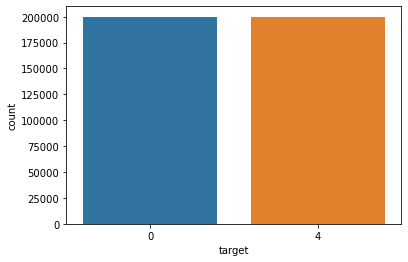

In [197]:
sns.countplot(x='target',data=tweets)

In [198]:
data=tweets[['text','target']]

In [199]:
data['target'] = data['target'].replace(4,1)

<ipython-input-199-54c9eb4fa536>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [201]:
dataset = pd.concat([data_pos, data_neg])

<AxesSubplot:xlabel='target', ylabel='count'>

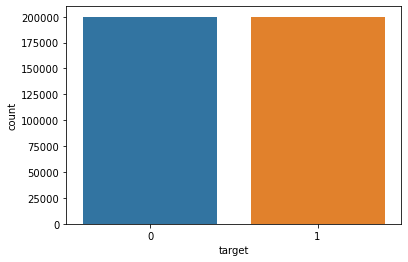

In [202]:
sns.countplot(x='target',data=dataset)

In [203]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                      gmail is down? 
799997                        rest in peace farrah! so sad 
799998    @eric_urbane sounds like a rival is flagging y...
799999    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

In [204]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [205]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [206]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

In [207]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

799995    sick spending day laying bed listening @taylor...
799996                                          gmail down?
799997                               rest peace farrah! sad
799998    @eric_urbane sounds like rival flagging ads. n...
799999    resit exams over summer... wishes worked harde...
Name: text, dtype: object

In [208]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

799995    sick spending day laying bed listening @taylor...
799996                                          gmail down?
799997                               rest peace farrah! sad
799998    @eric_urbane sounds like rival flagging ads. n...
799999    resit exams over summer... wishes worked harde...
Name: text, dtype: object

In [209]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

In [210]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [211]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [212]:
# Separating the 95% data for training data and 5% for testing data
X=data.text
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [213]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  250913


In [214]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)


In [215]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))


In [216]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      9930
           1       0.82      0.78      0.80     10070

    accuracy                           0.80     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000



In [217]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      9930
           1       0.81      0.81      0.81     10070

    accuracy                           0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



In [218]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      9930
           1       0.81      0.82      0.81     10070

    accuracy                           0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



In [ ]:
tweets_test = df_tweets['tweet']
tweets_test = vectoriser.transform(tweets_test)

In [249]:
LRmodel.predict(tweets_test)

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,